In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


DATA EXPLORATION

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


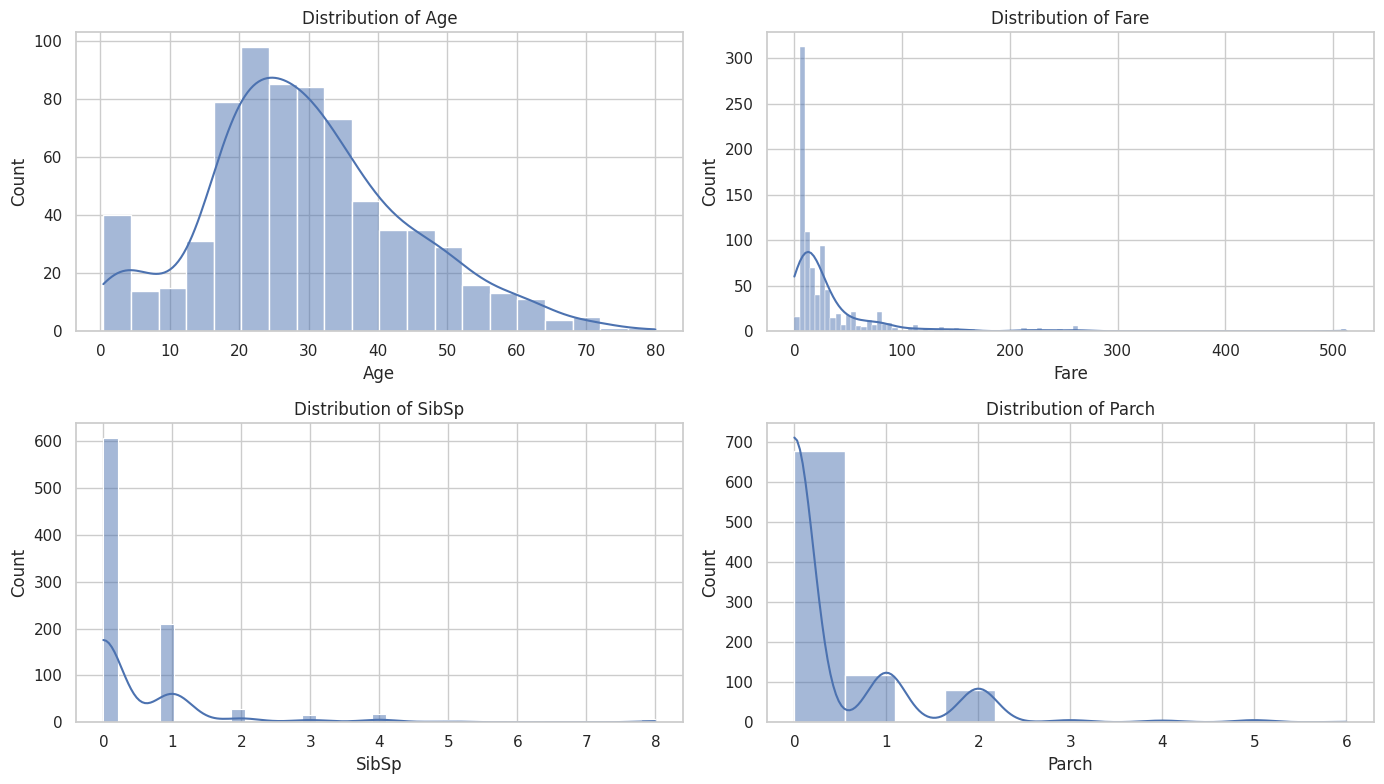

In [10]:
#Exploratory Data Analysis
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

## Distribution of numerical features

plt.subplot(2, 2, 1)
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(train_data['Fare'], kde=True)
plt.title('Distribution of Fare')

plt.subplot(2, 2, 3)
sns.histplot(x='SibSp', data=train_data, kde=True)
plt.title('Distribution of SibSp')

plt.subplot(2, 2, 4)
sns.histplot(x='Parch', data=train_data, kde=True)
plt.title('Distribution of Parch')

plt.tight_layout()
plt.show()

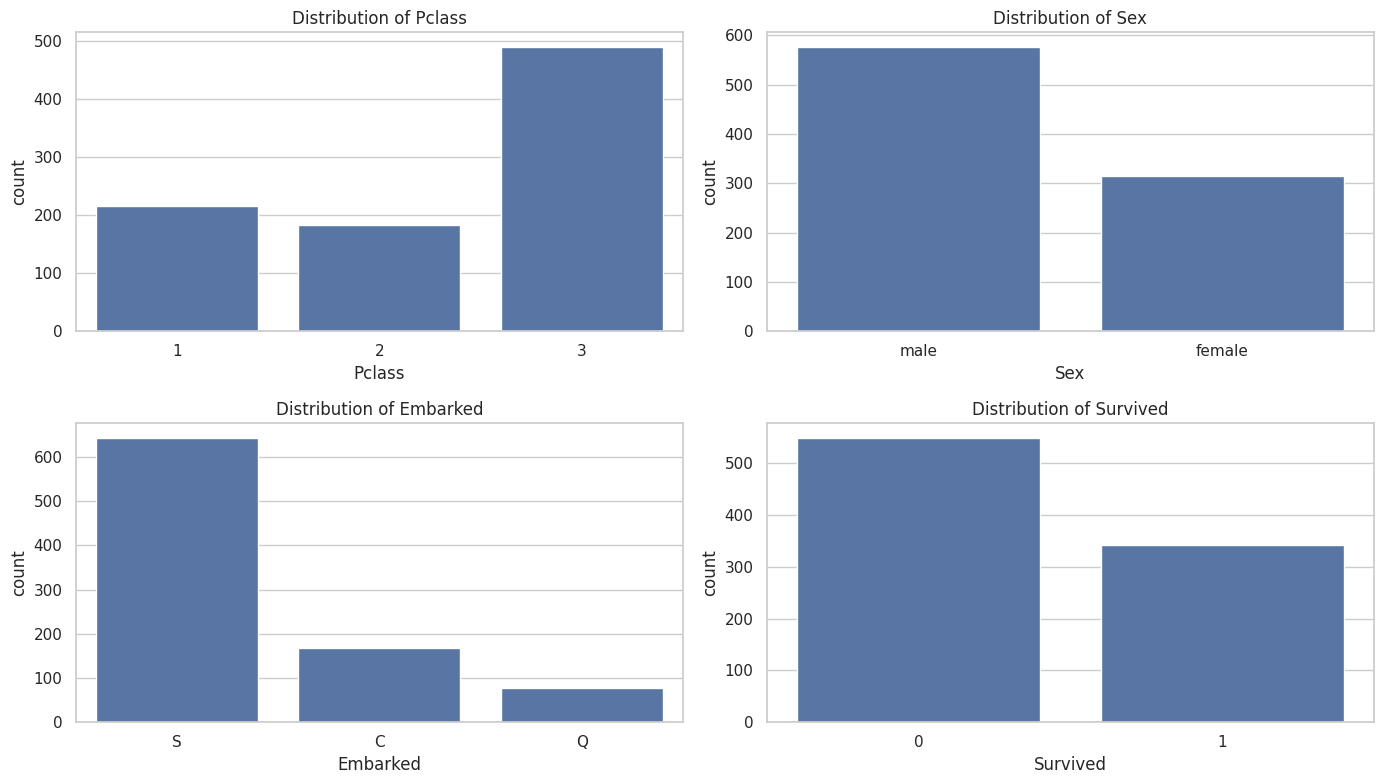

In [11]:
## 2. Distribution of Categorical Features

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribution of Pclass')

plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=train_data)
plt.title('Distribution of Sex')

plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', data=train_data)
plt.title('Distribution of Embarked')

plt.subplot(2, 2, 4)
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')

plt.tight_layout()
plt.show()

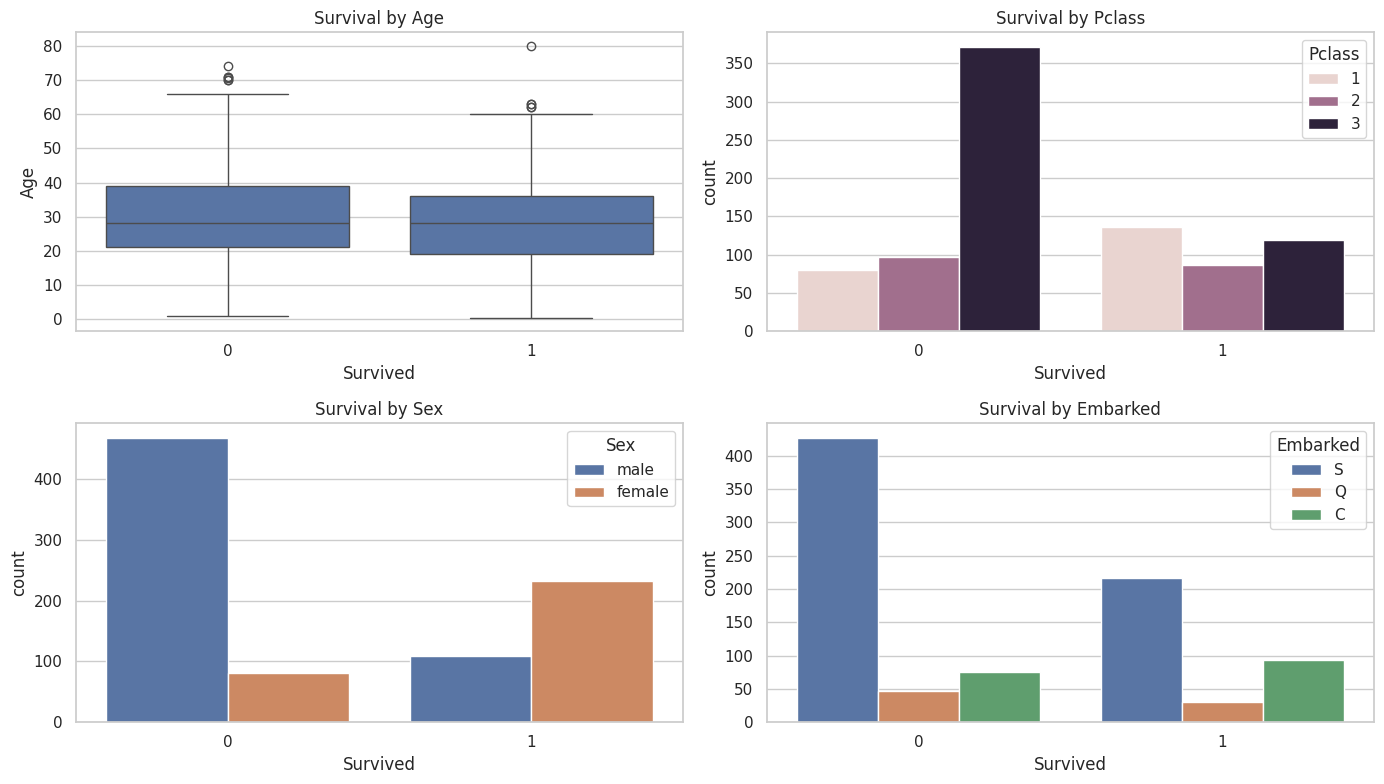

In [12]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Survival by Age')

plt.subplot(2, 2, 2)
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival by Pclass')

plt.subplot(2, 2, 3)
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Sex')

plt.subplot(2, 2, 4)
sns.countplot(x='Survived', hue='Embarked', data=train_data)
plt.title('Survival by Embarked')

plt.tight_layout()
plt.show()

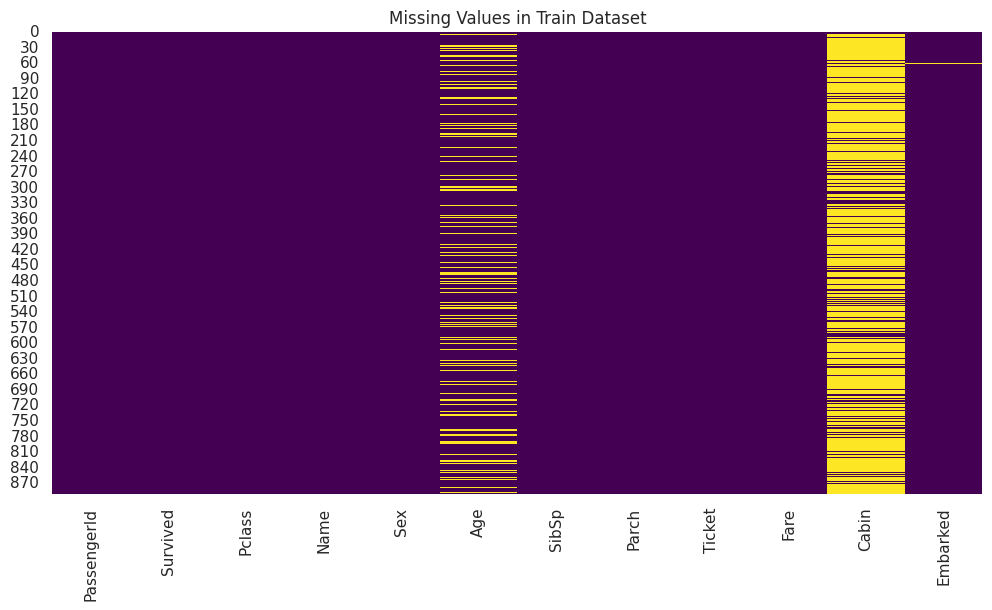

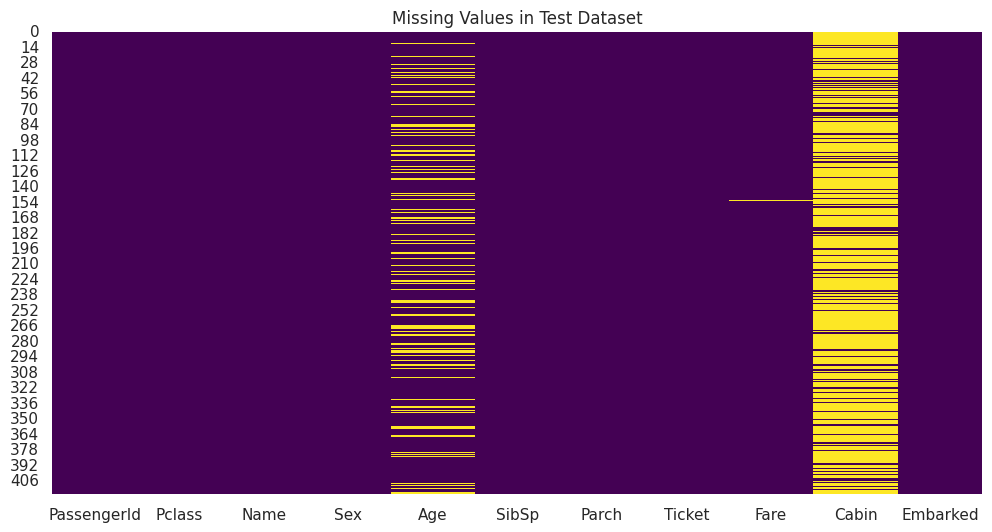

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Dataset')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Dataset')
plt.show()

In [15]:
# Fill missing values in 'Age' with the median value
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values in 'Fare' in the test set with the median value
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# For 'Cabin', create a new feature indicating whether a cabin was assigned
train_data['CabinAssigned'] = train_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
test_data['CabinAssigned'] = test_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop the original 'Cabin' column as it has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

# Check the data again after cleaning
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
CabinAssigned    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
CabinAssigned    0
dtype: int64


In [16]:
# Create 'FamilySize' feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create 'IsAlone' feature
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

In [17]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinAssigned,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1,1


In [18]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinAssigned,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,0,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,0,1,1


In [19]:
# Drop irrelevant columns
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [21]:
# Encode categorical variables
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinAssigned,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,0,2,0
1,1,1,0,38.0,1,0,71.2833,0,1,2,0
2,1,3,0,26.0,0,0,7.9250,2,0,1,1
3,1,1,0,35.0,1,0,53.1000,2,1,2,0
4,0,3,1,35.0,0,0,8.0500,2,0,1,1


In [23]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinAssigned,FamilySize,IsAlone
0,892,3,1,34.5,0,0,7.8292,1,0,1,1
1,893,3,0,47.0,1,0,7.0000,2,0,2,0
2,894,2,1,62.0,0,0,9.6875,1,0,1,1
3,895,3,1,27.0,0,0,8.6625,2,0,1,1
4,896,3,0,22.0,1,1,12.2875,2,0,3,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'CabinAssigned']
X = train_data[features]
y = train_data['Survived']
X_test = test_data[features]

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8212290502793296


In [26]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model to get feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print feature importance scores
print("Feature importance scores:")
for f in range(X_train.shape[1]):
    print(f"{features[indices[f]]}: {feature_importances[indices[f]]}")

Feature importance scores:
Fare: 0.26604442356437297
Sex: 0.26543673228280446
Age: 0.24883501310014414
FamilySize: 0.07735623400253978
Pclass: 0.0700055634632401
CabinAssigned: 0.040195029630839374
Embarked: 0.03212700395605927


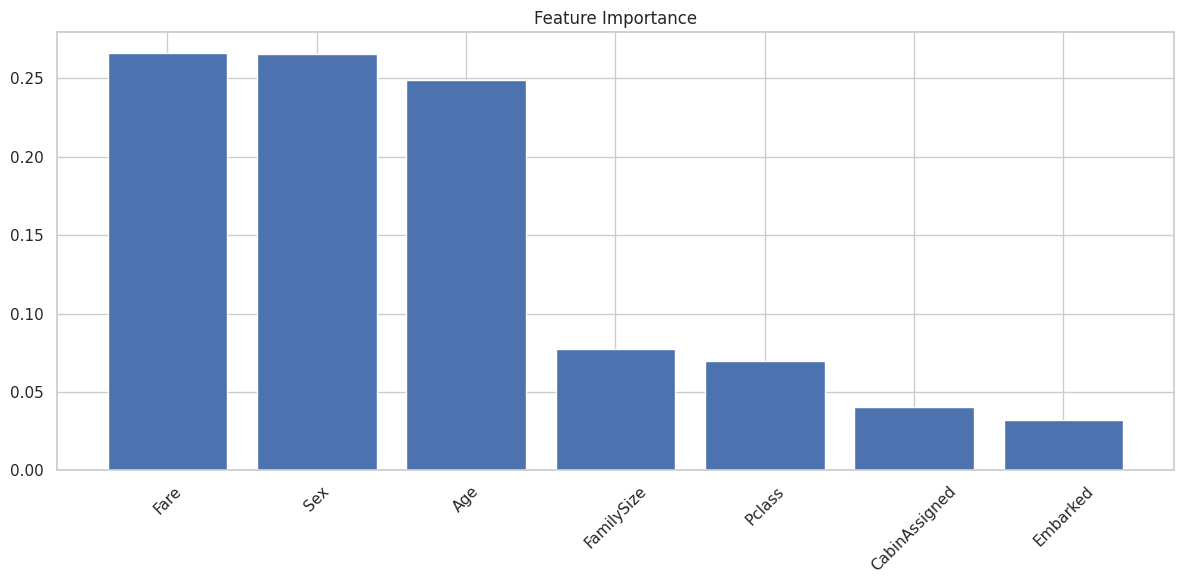

In [27]:
# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Select the top features based on feature importance
top_features = [features[i] for i in indices[:6]]
print("Top features selected:", top_features)

# Update the feature set
X = train_data[top_features]
X_test = test_data[top_features]

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model with the selected features
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, y_pred))

Top features selected: ['Fare', 'Sex', 'Age', 'FamilySize', 'Pclass', 'CabinAssigned']
Validation Accuracy: 0.8212290502793296


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Validate the model
y_pred_gb = gb_model.predict(X_val)
print('Validation Accuracy (Gradient Boosting):', accuracy_score(y_val, y_pred_gb))

Validation Accuracy (Gradient Boosting): 0.8212290502793296


In [30]:

#Testing the model
y_test_pred = model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred
})

In [31]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
